### some imports

In [90]:
import pandas as pd 
from datetime import datetime, time as datetime_time, timedelta
import matplotlib.pyplot as plt

### Reading the data

In [91]:
Deliveries_data = pd.read_csv("Sample Deliveries Data - 1 Month - Sheet1.csv")
print("data shape: ",Deliveries_data.shape)
Deliveries_data.head()

data shape:  (18078, 13)


,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Delivery Region,Is ASAP,Order total,Amount of discount,Amount of tip,Refunded amount
0,01 02:52:12,01 03:00:25,01 03:08:09,01 03:35:20,279,50,6738,Giza,True,16.33,0.0,0.82,0.0
1,13 15:58:57,13 17:56:45,13 18:24:39,13 18:57:01,303,96,64746,Nasr City,True,76.14,0.0,6.45,0.0
2,17 19:02:37,17 19:12:51,17 19:19:59,17 19:31:09,212,190,12484,Maadi,True,16.77,6.0,2.52,0.0
3,12 04:01:57,12 04:08:18,12 04:13:02,12 04:37:57,352,194,13920,Maadi,True,25.03,0.0,5.00,0.0
4,08 23:46:38,08 23:49:32,08 23:54:29,09 00:37:15,313,9,7037,Nasr City,True,51.57,0.0,5.16,0.0


### Data preprocessing 

##### 1. checking for duplicates

In [92]:
duplicates = Deliveries_data[Deliveries_data.duplicated()]
print("number of duplicates rows: ", len(duplicates))

number of duplicates rows:  0


#### 2. Feature selection

In [93]:
## i have selected the features that i will need 
newData = Deliveries_data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,12] ]
newData.head()

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Delivery Region,Is ASAP,Order total,Amount of discount,Refunded amount
0,01 02:52:12,01 03:00:25,01 03:08:09,01 03:35:20,279,50,6738,Giza,True,16.33,0.0,0.0
1,13 15:58:57,13 17:56:45,13 18:24:39,13 18:57:01,303,96,64746,Nasr City,True,76.14,0.0,0.0
2,17 19:02:37,17 19:12:51,17 19:19:59,17 19:31:09,212,190,12484,Maadi,True,16.77,6.0,0.0
3,12 04:01:57,12 04:08:18,12 04:13:02,12 04:37:57,352,194,13920,Maadi,True,25.03,0.0,0.0
4,08 23:46:38,08 23:49:32,08 23:54:29,09 00:37:15,313,9,7037,Nasr City,True,51.57,0.0,0.0


#### 3.checking for missing data if any

In [94]:
newData.isnull().sum()

Customer placed order datetime              0
Placed order with restaurant datetime      40
Driver at restaurant datetime            4531
Delivered to consumer datetime              0
Driver ID                                   0
Restaurant ID                               0
Consumer ID                                 0
Delivery Region                             0
Is ASAP                                     0
Order total                                 0
Amount of discount                          0
Refunded amount                             0
dtype: int64

In [95]:
## removing null values
newData.dropna(subset=['Placed order with restaurant datetime'], inplace=True)
newData.dropna(subset=["Driver at restaurant datetime"], inplace=True)

# newData["Driver at restaurant datetime"] = pd.to_datetime(newData["Driver at restaurant datetime"],format="%d %H:%M:%S")
# newData["Driver at restaurant datetime"] = newData["Driver at restaurant datetime"].fillna(newData["Driver at restaurant datetime"].mean())

C:\Users\yasme\AppData\Local\Temp\ipykernel_8448\877223442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData.dropna(subset=['Placed order with restaurant datetime'], inplace=True)
C:\Users\yasme\AppData\Local\Temp\ipykernel_8448\877223442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData.dropna(subset=["Driver at restaurant datetime"], inplace=True)


In [96]:
## make sure there is no null values
newData.isnull().sum()

Customer placed order datetime           0
Placed order with restaurant datetime    0
Driver at restaurant datetime            0
Delivered to consumer datetime           0
Driver ID                                0
Restaurant ID                            0
Consumer ID                              0
Delivery Region                          0
Is ASAP                                  0
Order total                              0
Amount of discount                       0
Refunded amount                          0
dtype: int64

In [97]:
newData.head()

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Delivery Region,Is ASAP,Order total,Amount of discount,Refunded amount
0,01 02:52:12,01 03:00:25,01 03:08:09,01 03:35:20,279,50,6738,Giza,True,16.33,0.0,0.0
1,13 15:58:57,13 17:56:45,13 18:24:39,13 18:57:01,303,96,64746,Nasr City,True,76.14,0.0,0.0
2,17 19:02:37,17 19:12:51,17 19:19:59,17 19:31:09,212,190,12484,Maadi,True,16.77,6.0,0.0
3,12 04:01:57,12 04:08:18,12 04:13:02,12 04:37:57,352,194,13920,Maadi,True,25.03,0.0,0.0
4,08 23:46:38,08 23:49:32,08 23:54:29,09 00:37:15,313,9,7037,Nasr City,True,51.57,0.0,0.0


#### 4. Feature engineering

In [98]:
## changing the time columns type from string to time
newData["Customer placed order datetime"] = pd.to_datetime(newData["Customer placed order datetime"],format="%d %H:%M:%S")
newData["Placed order with restaurant datetime"] = pd.to_datetime(newData["Placed order with restaurant datetime"],format="%d %H:%M:%S")
newData["Delivered to consumer datetime"] = pd.to_datetime(newData["Delivered to consumer datetime"],format="%d %H:%M:%S")
newData["Driver at restaurant datetime"] = pd.to_datetime(newData["Driver at restaurant datetime"],format="%d %H:%M:%S")

C:\Users\yasme\AppData\Local\Temp\ipykernel_8448\264954592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData["Customer placed order datetime"] = pd.to_datetime(newData["Customer placed order datetime"],format="%d %H:%M:%S")
C:\Users\yasme\AppData\Local\Temp\ipykernel_8448\264954592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData["Placed order with restaurant datetime"] = pd.to_datetime(newData["Placed order with restaurant datetime"],format="%d %H:%M:%S")
C:\Users\yasme\AppData\Local\T

In [99]:
## extract new features from the data, and create a new column for it in the data
newData["Time the res took to recieve the order"] = newData["Placed order with restaurant datetime"] - newData["Customer placed order datetime"]
newData["Time the driver took to get to the res"] = newData["Driver at restaurant datetime"] - newData["Placed order with restaurant datetime"]
newData["Time the driver took to deliver the order"] = newData["Delivered to consumer datetime"] - newData["Driver at restaurant datetime"]

C:\Users\yasme\AppData\Local\Temp\ipykernel_8448\3838330305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData["Time the res took to recieve the order"] = newData["Placed order with restaurant datetime"] - newData["Customer placed order datetime"]
C:\Users\yasme\AppData\Local\Temp\ipykernel_8448\3838330305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData["Time the driver took to get to the res"] = newData["Driver at restaurant datetime"] - newData["Placed order with restaurant datetime"]

In [100]:
## data after the new features 
newData.head()

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Delivery Region,Is ASAP,Order total,Amount of discount,Refunded amount,Time the res took to recieve the order,Time the driver took to get to the res,Time the driver took to deliver the order
0,1900-01-01 02:52:12,1900-01-01 03:00:25,1900-01-01 03:08:09,1900-01-01 03:35:20,279,50,6738,Giza,True,16.33,0.0,0.0,0 days 00:08:13,0 days 00:07:44,0 days 00:27:11
1,1900-01-13 15:58:57,1900-01-13 17:56:45,1900-01-13 18:24:39,1900-01-13 18:57:01,303,96,64746,Nasr City,True,76.14,0.0,0.0,0 days 01:57:48,0 days 00:27:54,0 days 00:32:22
2,1900-01-17 19:02:37,1900-01-17 19:12:51,1900-01-17 19:19:59,1900-01-17 19:31:09,212,190,12484,Maadi,True,16.77,6.0,0.0,0 days 00:10:14,0 days 00:07:08,0 days 00:11:10
3,1900-01-12 04:01:57,1900-01-12 04:08:18,1900-01-12 04:13:02,1900-01-12 04:37:57,352,194,13920,Maadi,True,25.03,0.0,0.0,0 days 00:06:21,0 days 00:04:44,0 days 00:24:55
4,1900-01-08 23:46:38,1900-01-08 23:49:32,1900-01-08 23:54:29,1900-01-09 00:37:15,313,9,7037,Nasr City,True,51.57,0.0,0.0,0 days 00:02:54,0 days 00:04:57,0 days 00:42:46


#### 5. Encode categorical features 

In [101]:
## encoding delivery region, and is asap columns (changing their type from categorical to int)

newData["Delivery Region"] = newData["Delivery Region"].astype('category')
newData["Delivery Region"] = newData["Delivery Region"].cat.codes #  gizza -> 0   maadi -> 1   nasr city -> 2    None ->3

newData["Is ASAP"] = newData["Is ASAP"].astype('category')
newData["Is ASAP"] = newData["Is ASAP"].cat.codes # true -> 1   false -> 0

newData.head()

C:\Users\yasme\AppData\Local\Temp\ipykernel_8448\2423586261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData["Delivery Region"] = newData["Delivery Region"].astype('category')
C:\Users\yasme\AppData\Local\Temp\ipykernel_8448\2423586261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData["Delivery Region"] = newData["Delivery Region"].cat.codes #  gizza -> 0   maadi -> 1   nasr city -> 2    None ->3
C:\Users\yasme\AppData\Local\Temp\ipykernel_8448\2423586261.py:6: SettingWithCopyWarning: 


,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Delivery Region,Is ASAP,Order total,Amount of discount,Refunded amount,Time the res took to recieve the order,Time the driver took to get to the res,Time the driver took to deliver the order
0,1900-01-01 02:52:12,1900-01-01 03:00:25,1900-01-01 03:08:09,1900-01-01 03:35:20,279,50,6738,0,1,16.33,0.0,0.0,0 days 00:08:13,0 days 00:07:44,0 days 00:27:11
1,1900-01-13 15:58:57,1900-01-13 17:56:45,1900-01-13 18:24:39,1900-01-13 18:57:01,303,96,64746,2,1,76.14,0.0,0.0,0 days 01:57:48,0 days 00:27:54,0 days 00:32:22
2,1900-01-17 19:02:37,1900-01-17 19:12:51,1900-01-17 19:19:59,1900-01-17 19:31:09,212,190,12484,1,1,16.77,6.0,0.0,0 days 00:10:14,0 days 00:07:08,0 days 00:11:10
3,1900-01-12 04:01:57,1900-01-12 04:08:18,1900-01-12 04:13:02,1900-01-12 04:37:57,352,194,13920,1,1,25.03,0.0,0.0,0 days 00:06:21,0 days 00:04:44,0 days 00:24:55
4,1900-01-08 23:46:38,1900-01-08 23:49:32,1900-01-08 23:54:29,1900-01-09 00:37:15,313,9,7037,2,1,51.57,0.0,0.0,0 days 00:02:54,0 days 00:04:57,0 days 00:42:46


### Answering some questions

##### how many orders were made by the same customer?

In [102]:
customers = newData["Consumer ID"].unique()  ## extact the customers
freq_OF_customer=newData["Consumer ID"].value_counts() ## get the number of orders for each customer
print("max number of orders with the same customer: ", max(freq_OF_customer))
print("min number of orders with the same customer: ", min(freq_OF_customer))

max number of orders with the same customer:  54
min number of orders with the same customer:  1


##### Daily active drivers/users

In [103]:
## check number of orders in each day 
m = newData.shape[0]
DailyActiveUsers = []
count = 0

for i in range(31):
    for j in range(m):
        d = newData["Customer placed order datetime"].iloc[j].day
        if i+1 == d :
            count += 1
    DailyActiveUsers.append(count)
    count = 0

In [104]:
DailyActiveUsers_avg = round(sum(DailyActiveUsers)/31)
print("daily active users average: ", DailyActiveUsers_avg)

daily active users average:  436


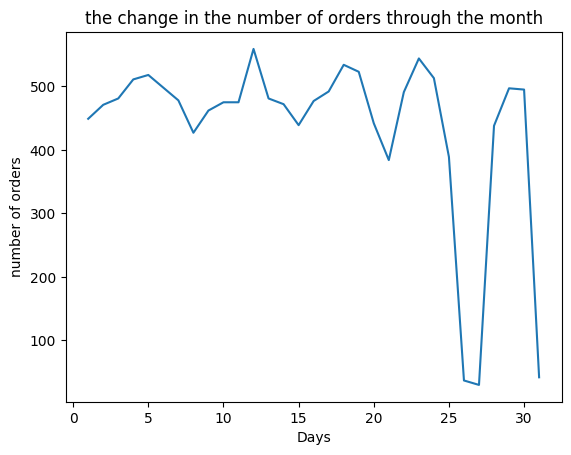

In [105]:
Days = list(range(1,32))
fig, ax = plt.subplots()
ax.plot(Days, DailyActiveUsers)
plt.xlabel("Days")
plt.ylabel("number of orders")
plt.title("the change in the number of orders through the month")
plt.show()

In [106]:
DailyActiveUsers_Data = {
    "daily active users/drivers": DailyActiveUsers
}
## i made this step to visualize it in excel
DailyActiveUsers_Data = pd.DataFrame(DailyActiveUsers_Data)
# DailyActiveUsers_Data.to_excel("DailyActiveUsers.xlsx",sheet_name="daily active users or drivers")

##  Drivers’ Analysis

##### Delivery Drivers Productivity

In [107]:
## count number of orders based on the driver id 
Driver_productivty = newData["Driver ID"].value_counts()
drivers = Driver_productivty.index

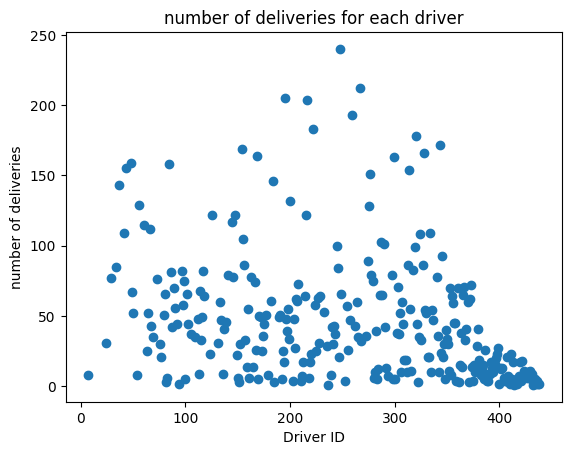

In [108]:
fig, ax = plt.subplots()
ax.scatter(drivers, Driver_productivty)
ax.set_xlabel("Driver ID")
ax.set_ylabel("number of deliveries")
ax.set_title("number of deliveries for each driver")
plt.show()

In [109]:
print("maximum number of deliveries:", max(Driver_productivty) , " Driver ID:", Driver_productivty.idxmax() )
print("minimum number of deliveries:", min(Driver_productivty) , " Driver ID:", Driver_productivty.idxmin() )
print("average number of deliveries for delivery drivers through the month:", round(sum(Driver_productivty)/len(drivers)))

maximum number of deliveries: 240  Driver ID: 248
minimum number of deliveries: 1  Driver ID: 236
average number of deliveries for delivery drivers through the month: 46


##### working hours spent for each driver

In [110]:
## calculate working hours for drivers
totalTime = 0
TimeForDrivers = []
for i in range(len(drivers)):
    for j in range(len(newData["Driver ID"])):
        d = drivers[i]
        if d == newData["Driver ID"].iloc[j]:
            date = newData["Time the driver took to deliver the order"].iloc[i]
            time = round((abs( ((date.days) * 24 * 60 * 60) + (date.seconds)))/60)
            totalTime = totalTime + time
    totalTime = round((totalTime/60),2)
    TimeForDrivers.append(totalTime)
    totalTime=0

In [111]:
MaxNum_hours_index = TimeForDrivers.index(max(TimeForDrivers))
MinNum_hours_index = TimeForDrivers.index(min(TimeForDrivers))

print("maximum hours spent:", max(TimeForDrivers)  )
print("minimum hours spent:", min(Driver_productivty)  )

maximum hours spent: 138.32
minimum hours spent: 1


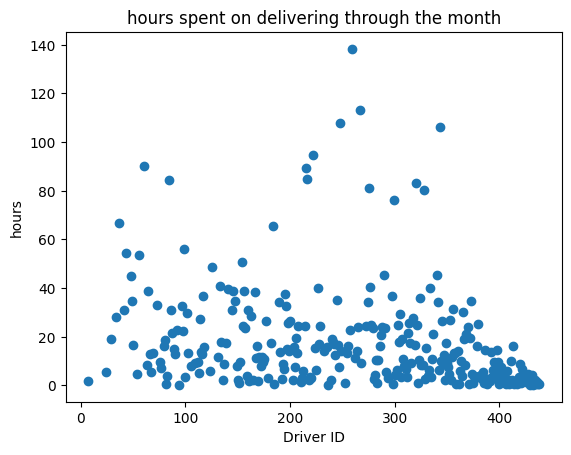

In [112]:
fig, ax = plt.subplots()
ax.scatter(drivers, TimeForDrivers)
ax.set_xlabel("Driver ID")
ax.set_ylabel("hours")
ax.set_title("hours spent on delivering through the month")
plt.show()

##### Average time needed to deliver the order for each driver

In [113]:
c = 0
cumilativeTime = 0
avgTime_toDelivery = []
for i in range(len(drivers)):
    for j in range(len(newData["Time the driver took to deliver the order"])):
        d = drivers[i]
        if d == newData["Driver ID"].iloc[j]:
            date = newData["Time the driver took to deliver the order"].iloc[i]
            time = round((abs( ((date.days) * 24 * 60 * 60) + (date.seconds)))/60)
            cumilativeTime += time
            c+=1
    avgTime_toDelivery.append(round(cumilativeTime/c))
    cumilativeTime = 0
    c = 0  

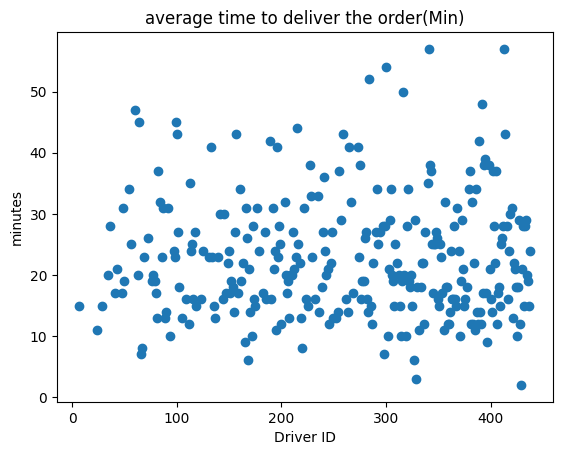

In [114]:
fig, ax = plt.subplots()
ax.scatter(drivers, avgTime_toDelivery)
ax.set_xlabel("Driver ID")
ax.set_ylabel("minutes")
ax.set_title("average time to deliver the order(Min)")
plt.show()

##### Average time needed to get to the restaurant

In [115]:
c2 = 0
cumilativeTime_toRest = 0
avgTime_toRest = []
for i in range(len(drivers)):
    for j in range(len(newData["Time the driver took to get to the res"])):
        d = drivers[i]
        if d == newData["Driver ID"].iloc[j]:
            date2 = newData["Time the driver took to get to the res"].iloc[i]
            time2 = round((abs( ((date2.days) * 24 * 60 * 60) + (date2.seconds)))/60)
            cumilativeTime_toRest += time2
            c2+=1
    avgTime_toRest.append(round(cumilativeTime_toRest/c2))
    cumilativeTime_toRest = 0
    c2 = 0  

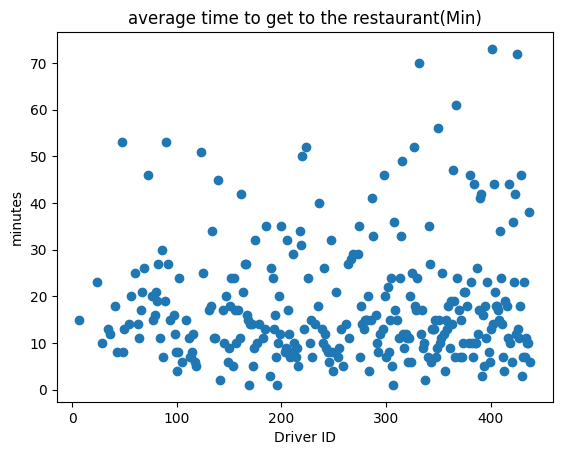

In [116]:
fig, ax = plt.subplots()
ax.scatter(drivers, avgTime_toRest)
ax.set_xlabel("Driver ID")
ax.set_ylabel("minutes")
ax.set_title("average time to get to the restaurant(Min)")
plt.show()

In [117]:
Drivers_Data = {
    "Driver ID" : drivers,
    "Driver productivity" : Driver_productivty,
    "Time driver spent on delivery(Hours)": TimeForDrivers,
    "Average time driver need to deliver the order(Minutes)": avgTime_toDelivery,
    "Average time driver need to go to the Restaurant(Minutes)": avgTime_toRest
} 

Drivers_Data = pd.DataFrame(Drivers_Data)
Drivers_Data


,Driver ID,Driver productivity,Time driver spent on delivery(Hours),Average time driver need to deliver the order(Minutes),Average time driver need to go to the Restaurant(Minutes)
248,248,240,108.00,27,8
267,267,212,113.07,32,28
195,195,205,37.58,11,7
216,216,204,85.00,25,5
259,259,193,138.32,43,5
...,...,...,...,...,...
435,435,2,0.67,20,10
94,94,2,0.33,10,15
236,236,1,0.23,14,40
432,432,1,0.25,15,23


In [118]:
Drivers_Data.to_excel("driversData.xlsx",sheet_name="drivers analysis")

## Restaurants Analysis

##### Number of orders each restaurant made through the month

In [119]:
numOf_orders = newData["Restaurant ID"].value_counts()
restaurants = numOf_orders.index
print("number of restaurant available: ", len(restaurants))

number of restaurant available:  306


In [120]:
print("maximum number of orders through the month:", max(numOf_orders) , " Restaurant ID:", numOf_orders.idxmax() )
print("minimum number of orders through the month:", min(numOf_orders) , " Restaurant ID:", numOf_orders.idxmin() )

maximum number of orders through the month: 631  Restaurant ID: 8
minimum number of orders through the month: 1  Restaurant ID: 390


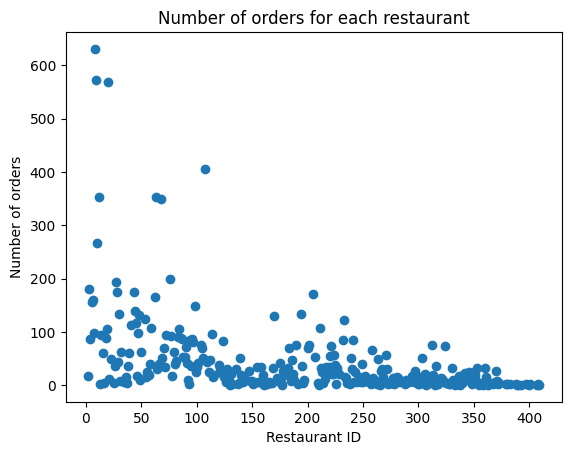

In [121]:
fig, ax = plt.subplots()
ax.scatter(restaurants, numOf_orders)
ax.set_xlabel("Restaurant ID")
ax.set_ylabel("Number of orders")
ax.set_title("Number of orders for each restaurant")
plt.show()

##### average time each restaurant need to recieve an order

In [122]:
z = 0 
tTotal = 0
avgTime_toRecieve_order = []
for i in range(len(restaurants)):
    for j in range(len(newData["Time the res took to recieve the order"])):
        if restaurants[i] == newData["Restaurant ID"].iloc[j]:
            t = newData["Time the res took to recieve the order"].iloc[j]
            t = round((abs( ((t.days) * 24 * 60 * 60) + (t.seconds)))/60)
            tTotal += t
            z+=1
    avgTime_toRecieve_order.append(round(tTotal/z))
    tTotal = 0

In [123]:
MaxNum_time = avgTime_toRecieve_order.index(max(avgTime_toRecieve_order))
MinNum_time = avgTime_toRecieve_order.index(min(avgTime_toRecieve_order))

print("maximum time to recieve the order:", max(avgTime_toRecieve_order) )
print("minimum  time to recieve the order:", min(avgTime_toRecieve_order)  )

maximum time to recieve the order: 96
minimum  time to recieve the order: 0


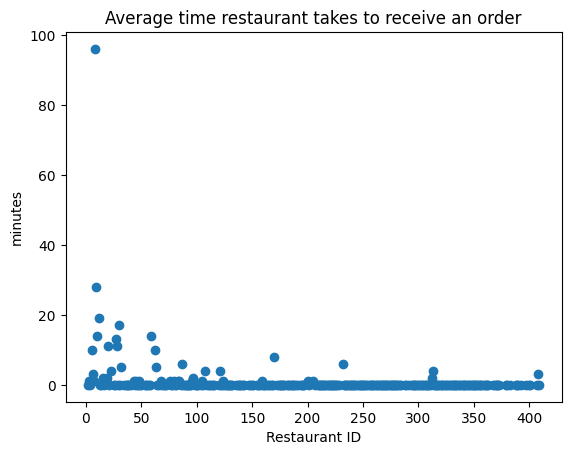

In [124]:
fig, ax = plt.subplots()
ax.scatter(restaurants, avgTime_toRecieve_order)
ax.set_xlabel("Restaurant ID")
ax.set_ylabel("minutes")
ax.set_title("Average time restaurant takes to receive an order")
plt.show()

##### Total profit for each restaurant from deliveries

In [125]:
cumulative_profit = 0
total_profits = []
for i in range(len(restaurants)):
    for j in range(len(newData["Order total"])):
        if restaurants[i] == newData["Restaurant ID"].iloc[j]:
            cumulative_profit += newData["Order total"].iloc[j] - (newData["Amount of discount"].iloc[j] + newData["Refunded amount"].iloc[j])
    total_profits.append(cumulative_profit)
    cumulative_profit = 0

In [126]:
restarurant_Data = {
    "restaurant ID" : restaurants,
    "number of orders" : numOf_orders,
    "Average time restaurant need to recieve an order": avgTime_toRecieve_order,
    "total profit from deliveries": total_profits
}

restarurant_Data = pd.DataFrame(restarurant_Data)
restarurant_Data


,restaurant ID,number of orders,Average time restaurant need to recieve an order,total profit from deliveries
8,8,631,96,32849.65
9,9,572,28,30905.26
20,20,569,11,25226.69
107,107,406,4,20953.91
63,63,354,5,25359.27
...,...,...,...,...
333,333,1,0,34.64
177,177,1,0,34.76
358,358,1,0,44.97
307,307,1,0,61.55


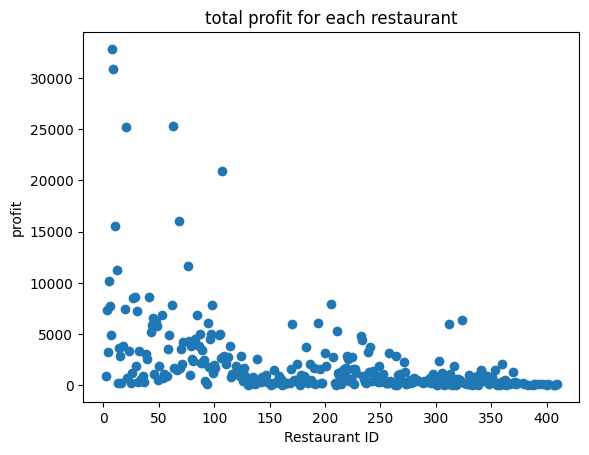

In [127]:
fig, ax = plt.subplots()
ax.scatter(restaurants, total_profits)
ax.set_xlabel("Restaurant ID")
ax.set_ylabel("profit")
ax.set_title("total profit for each restaurant")
plt.show()

In [128]:
restarurant_Data.to_excel("RestaurantData.xlsx",sheet_name="restaurant analysis")

## Regions and number of orders

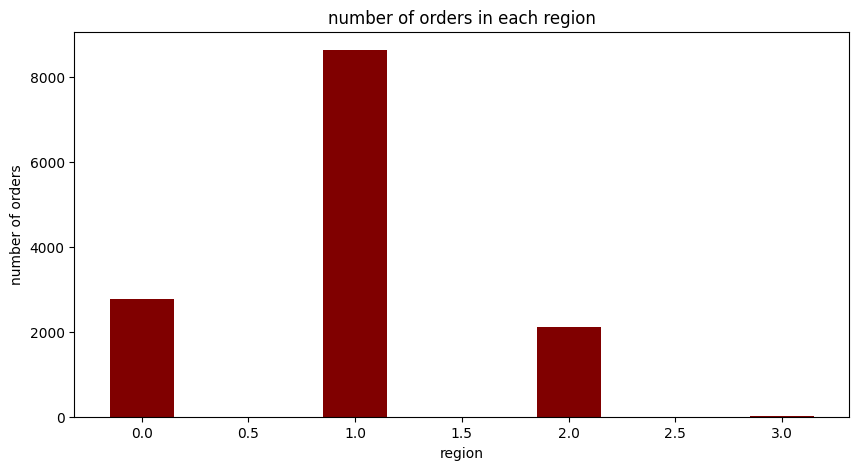

In [129]:
regions = newData["Delivery Region"].unique()

l = []

gizzaNum_Orders =newData[newData["Delivery Region"]==0].count()[0]
maadiNum_Orders =newData[newData["Delivery Region"]==1].count()[0]
nasrCity_Orders =newData[newData["Delivery Region"]==2].count()[0]
None_Orders = newData[newData["Delivery Region"]==3].count()[0]

l.append(gizzaNum_Orders)
l.append(maadiNum_Orders)
l.append(nasrCity_Orders)
l.append(None_Orders)

fig = plt.figure(figsize = (10, 5))
plt.bar(regions, l, color ='maroon',width = 0.3)
plt.xlabel("region")
plt.ylabel("number of orders")
plt.title("number of orders in each region")

plt.show()

In [130]:
## change the time columns to string again to save it in csv file

newData["Customer placed order datetime"] = newData["Customer placed order datetime"].astype(str)
newData["Placed order with restaurant datetime"] = newData["Placed order with restaurant datetime"].astype(str)
newData["Driver at restaurant datetime"] = newData["Driver at restaurant datetime"].astype(str)
newData["Delivered to consumer datetime"] = newData["Delivered to consumer datetime"].astype(str)
newData["Time the res took to recieve the order"] = newData["Time the res took to recieve the order"].astype(str)
newData["Time the driver took to deliver the order"] = newData["Time the driver took to deliver the order"].astype(str)
newData["Time the driver took to get to the res"] = newData["Time the driver took to get to the res"].astype(str)

newData.to_excel("newData.xlsx",sheet_name="Deliveries analysis")

C:\Users\yasme\AppData\Local\Temp\ipykernel_8448\1106540211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData["Customer placed order datetime"] = newData["Customer placed order datetime"].astype(str)
C:\Users\yasme\AppData\Local\Temp\ipykernel_8448\1106540211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData["Placed order with restaurant datetime"] = newData["Placed order with restaurant datetime"].astype(str)
C:\Users\yasme\AppData\Local\Temp\ipykernel_8448\1106540211.py:5: SettingWithC